# **1.heat map**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use('seaborn')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Paperlogy'

In [2]:
import numpy as np
import pandas as pd
 
n = 1000
 
# 기본 능력치 생성 (학생들의 전반적인 학습 능력)
base_ability = np.random.normal(0, 1, size=n)
physical_ability = np.random.normal(0, 1, size=n)  # 체육 능력 추가
 
# 과목별 점수 생성
국어 = 75 + 10 * (0.7 * base_ability + 0.3 * np.random.normal(0, 1, size=n))
영어 = 72 + 12 * (0.6 * base_ability + 0.4 * np.random.normal(0, 1, size=n))
수학 = 70 + 15 * (0.8 * base_ability + 0.2 * np.random.normal(0, 1, size=n))
# 체육은 수학과 반비례하도록 -base_ability 사용
체육 = 80 + 8 * (-0.6 * base_ability + 0.8 * physical_ability + 0.2 * np.random.normal(0, 1, size=n))
 
# 점수 범위 조정 및 반올림
data = {
    '국어': np.round(np.clip(국어, 50, 100), 1),
    '영어': np.round(np.clip(영어, 50, 100), 1),
    '수학': np.round(np.clip(수학, 50, 100), 1),
    '체육': np.round(np.clip(체육, 50, 100), 1),
    '성별': np.random.choice(['남', '여'], size=n),
    '반': np.random.choice([f'{i}반' for i in range(1,10)], size=n)
}
 
df = pd.DataFrame(data)

## **1. heatmap 기본**
* 데이터만 넣으면 아무것도 안보인다.

* corr 범위가 [-1,1]이라 coolwarm같은 cmap 사용 추천

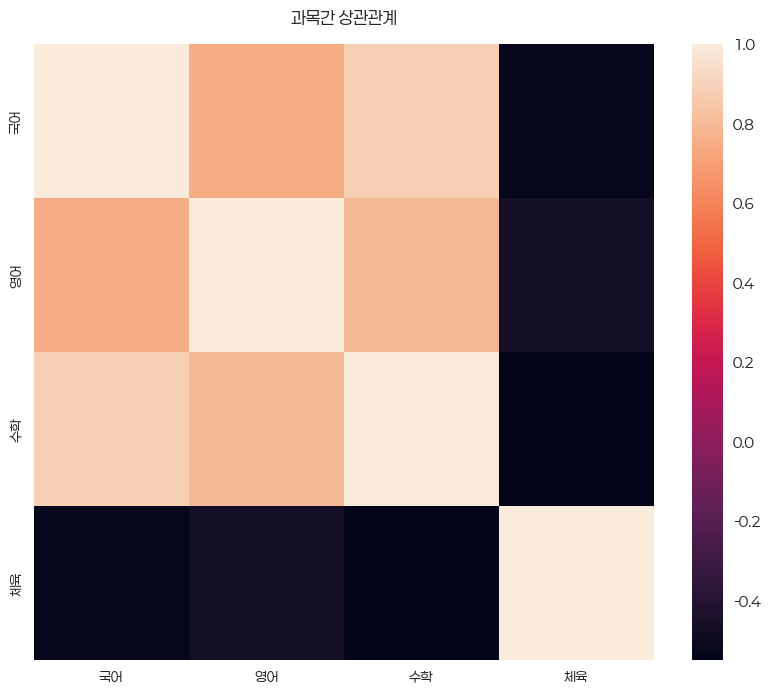

In [3]:
plt.figure(figsize=(10, 8))
corr = df[['국어', '영어', '수학', '체육']].corr()
sns.heatmap(
    data=corr,
)
plt.title('과목간 상관관계', pad=15)
plt.show()

## **2. heatmap 스타일링**

* cmap color bar 지정 시, vmin vmax를 지정할 수 있다.

* 음의 상관관계가 없거나, 너무 좁은 범위에 몰려있으면 색깔이 비슷해서 구분하기가 힘들다.

* 이 때 vmin vmax를 전달해서 설정하기.

Text(0.5, 1.0, '과목별 상관관계 분석')

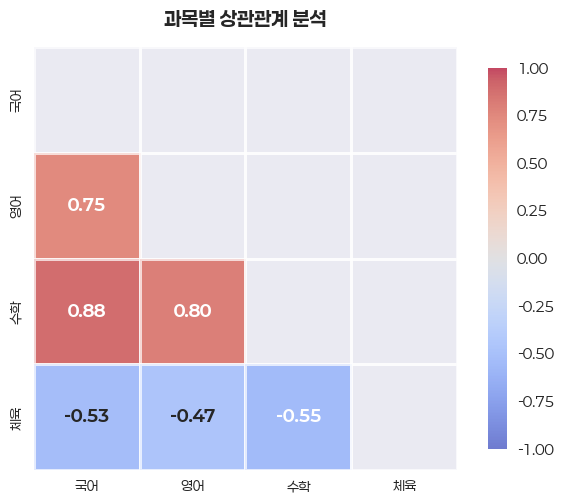

In [4]:
# 상관계수 계산
corr = df[['국어', '영어', '수학', '체육']].corr()
 
# 히트맵 생성
sns.heatmap(
    # 데이터 설정
    data=corr,
    
    # 색상 설정: 컬러맵 / 컬러바 / 최소범위 / 최대범위 / 투명도 / 컬러바 크기
    cmap='coolwarm', cbar=True, vmin=-1, vmax=1, alpha=0.7, cbar_kws={'shrink':0.9},
    
    # 데이터값 표시: 소수점 자리수 / 글자크기 / 글자색
    annot=True, fmt='.2f', annot_kws={'size':12, 'weight':'bold'},
    
    # 선 설정: 선 너비 / 선 색상
    linewidths=2, linecolor='white',
    
    # 기타 설정: 정사각형 / 마스크
    square=True,  mask=np.triu(corr) # 으로 상단만 표시 가능
)
 
plt.title('과목별 상관관계 분석', pad=15, size=14, weight='bold')

## **3. example**

Text(0.5, 1.0, '과목간 상관관계')

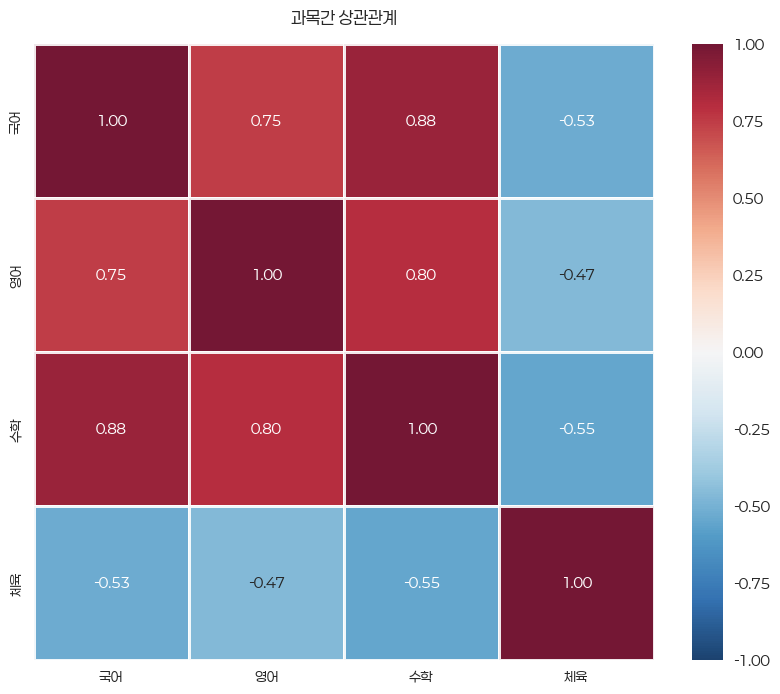

In [5]:
plt.figure(figsize=(10, 8))
corr = df[['국어', '영어', '수학', '체육']].corr()
 
sns.heatmap(
    # 데이터 설정
    data=corr,
    
    # 색상 설정: 컬러맵 / 컬러바 / 최소범위 / 최대범위 / 투명도
    cmap='RdBu_r', cbar=True, vmin=-1, vmax=1, alpha=0.9,
    
    # 데이터값 표시: 소수점 자리수
    annot=True, fmt='.2f',
    
    # 선 설정: 선 너비 / 선 색상
    linewidths=1, linecolor='white',
)
 
plt.title('과목간 상관관계', pad=15)

## **4. snippet**

In [6]:
# "Seaborn Heatmap Template": {
# 	"prefix": "sns_heatmap",
# 	"body": [
# 	  "sns.heatmap(",
# 	  "    # 1. 데이터 설정",
# 	  "    data=${1:corr},",
# 	  "",
# 	  "    # 2. 색상 설정: 컬러맵 / 컬러바 / 최소범위 / 최대범위 / 투명도 / 컬러바 크기",
# 	  "    cmap='${2:coolwarm}', cbar=${3:True}, vmin=${4:-1}, vmax=${5:1}, alpha=${6:0.8}, cbar_kws={'shrink':${7:0.9}},",
# 	  "",
# 	  "    # 3. 데이터값 표시: 소수점 자리수 / 글자크기 / 글자색",
# 	  "    annot=${8:True}, fmt='${9:.2f}', annot_kws={'size':${10:12}, 'weight':'bold'},",
# 	  "",
# 	  "    # 4. 선 설정: 선 너비 / 선 색상",
# 	  "    linewidths=${11:2}, linecolor='${12:white}',",
# 	  "",
# 	  "    # 5. 기타 설정: 정사각형 / 마스크",
# 	  "    square=${13:True}, mask=${14:np.triu(corr)}",
# 	  ")",
# 	  "# 제목 설정",
# 	  "plt.title('${15:Title}', pad=${16:15}, size=${17:14}, weight='bold')",
# 	  "plt.show()"
# 	],
# 	"description": "Create a Seaborn heatmap with common parameters"
#   }